<a href="https://colab.research.google.com/github/muoyo/chicago-ridesharing/blob/anesu/Chicago_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install sodapy

In [0]:
#!/usr/bin/env python

# make sure to install these packages before running:
# pip install pandas
# pip install sodapy

import pandas as pd
from sodapy import Socrata

# Unauthenticated client only works with public data sets. Note 'None'
# in place of application token, and no username or password:
#client = Socrata("data.cityofchicago.org", None, timeout=100)

#Example authenticated client (needed for non-public datasets):
client = Socrata("data.cityofchicago.org",
                 "N0amD6E3UkUmVTl5nFWXbIyl4",
                 username="anesumasube@gmail.com",
                 password="Marywandi11!", timeout=1000)

# First 2000 results, returned as JSON from API / converted to Python list of
# dictionaries by sodapy.
results = client.get("m6dm-c72p",limit=1000000, select='trip_id, trip_start_timestamp, trip_end_timestamp, trip_seconds, trip_miles, pickup_community_area, dropoff_community_area, fare, tip, additional_charges, trip_total ')
# Convert to pandas DataFrame
results_df = pd.DataFrame.from_records(results)

In [4]:
results_df.describe()

,trip_id,trip_start_timestamp,trip_end_timestamp,trip_seconds,trip_miles,pickup_community_area,dropoff_community_area,fare,tip,additional_charges,trip_total
count,1000000,1000000,1000000,992868,999906,937437,930766,1000000,1000000,1000000,1000000
unique,1000000,8889,8891,4981,735806,77,77,101,51,1361,8596
top,4e69cc4862d5fc8ddb492515347ada9ff48eaa2a,2019-03-30T22:15:00.000,2019-06-06T00:00:00.000,900,0,8,8,5,0,2.55,7.55
freq,1,289,7217,1960,215,163671,155624,212877,811240,737337,155874


In [5]:
results_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 11 columns):
trip_id                   1000000 non-null object
trip_start_timestamp      1000000 non-null object
trip_end_timestamp        1000000 non-null object
trip_seconds              992868 non-null object
trip_miles                999906 non-null object
pickup_community_area     937437 non-null object
dropoff_community_area    930766 non-null object
fare                      1000000 non-null object
tip                       1000000 non-null object
additional_charges        1000000 non-null object
trip_total                1000000 non-null object
dtypes: object(11)
memory usage: 83.9+ MB


In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import datetime 

In [0]:
results_df['trip_start_timestamp']= pd.to_datetime(results_df['trip_start_timestamp'])
results_df['trip_end_timestamp']= pd.to_datetime(results_df['trip_end_timestamp'])


for col in ['trip_miles','pickup_community_area','dropoff_community_area','fare','tip','additional_charges','trip_total']:
    results_df[col]= results_df[col].astype(float)

In [8]:
results_df.head()

,trip_id,trip_start_timestamp,trip_end_timestamp,trip_seconds,trip_miles,pickup_community_area,dropoff_community_area,fare,tip,additional_charges,trip_total
0,48b8c5efe758f9409c6f0aabd18828c2d38f0ffb,2019-05-20 14:30:00,2019-05-20 14:30:00,685,2.076983,24.0,8.0,7.5,0.0,2.55,10.05
1,48b8c63e665355f8b45fe446bdad07ffb790e814,2019-06-23 10:45:00,2019-06-23 11:00:00,950,6.015568,NaN,15.0,10.0,5.0,2.55,17.55
2,48b8c8dcda35fda6632c6efb34947a48c2afe4a8,2019-06-24 19:45:00,2019-06-24 20:00:00,400,1.970414,25.0,NaN,5.0,0.0,2.55,7.55
3,48b8c90e1a488bde7f99252fefdb39e0bb9670f0,2019-06-15 03:00:00,2019-06-15 03:00:00,501,2.437254,8.0,7.0,10.0,0.0,2.55,12.55
4,48b8c9c54cb887f865eb64ee0b9d882bd347e34f,2019-05-26 19:45:00,2019-05-26 19:45:00,452,0.937115,6.0,6.0,2.5,0.0,2.55,5.05


In [0]:
results_df['trip_seconds']= results_df['trip_seconds'].astype(float)

In [10]:
results_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 11 columns):
trip_id                   1000000 non-null object
trip_start_timestamp      1000000 non-null datetime64[ns]
trip_end_timestamp        1000000 non-null datetime64[ns]
trip_seconds              992868 non-null float64
trip_miles                999906 non-null float64
pickup_community_area     937437 non-null float64
dropoff_community_area    930766 non-null float64
fare                      1000000 non-null float64
tip                       1000000 non-null float64
additional_charges        1000000 non-null float64
trip_total                1000000 non-null float64
dtypes: datetime64[ns](2), float64(8), object(1)
memory usage: 83.9+ MB


In [0]:
import seaborn as sns

In [0]:
#results_df.drop(columns='trip_id')

In [13]:
results_df.head()

,trip_id,trip_start_timestamp,trip_end_timestamp,trip_seconds,trip_miles,pickup_community_area,dropoff_community_area,fare,tip,additional_charges,trip_total
0,48b8c5efe758f9409c6f0aabd18828c2d38f0ffb,2019-05-20 14:30:00,2019-05-20 14:30:00,685.0,2.076983,24.0,8.0,7.5,0.0,2.55,10.05
1,48b8c63e665355f8b45fe446bdad07ffb790e814,2019-06-23 10:45:00,2019-06-23 11:00:00,950.0,6.015568,NaN,15.0,10.0,5.0,2.55,17.55
2,48b8c8dcda35fda6632c6efb34947a48c2afe4a8,2019-06-24 19:45:00,2019-06-24 20:00:00,400.0,1.970414,25.0,NaN,5.0,0.0,2.55,7.55
3,48b8c90e1a488bde7f99252fefdb39e0bb9670f0,2019-06-15 03:00:00,2019-06-15 03:00:00,501.0,2.437254,8.0,7.0,10.0,0.0,2.55,12.55
4,48b8c9c54cb887f865eb64ee0b9d882bd347e34f,2019-05-26 19:45:00,2019-05-26 19:45:00,452.0,0.937115,6.0,6.0,2.5,0.0,2.55,5.05


In [0]:
results_df.to_csv('rideshare1.csv', index=False)

In [15]:
!pwd

/content


In [16]:
! ~

/bin/bash: /root: Is a directory


In [17]:
ride_data = results_df.iloc[:200001,1:7]
ride_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200001 entries, 0 to 200000
Data columns (total 6 columns):
trip_start_timestamp      200001 non-null datetime64[ns]
trip_end_timestamp        200001 non-null datetime64[ns]
trip_seconds              198616 non-null float64
trip_miles                199980 non-null float64
pickup_community_area     187368 non-null float64
dropoff_community_area    186308 non-null float64
dtypes: datetime64[ns](2), float64(4)
memory usage: 9.2 MB


/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


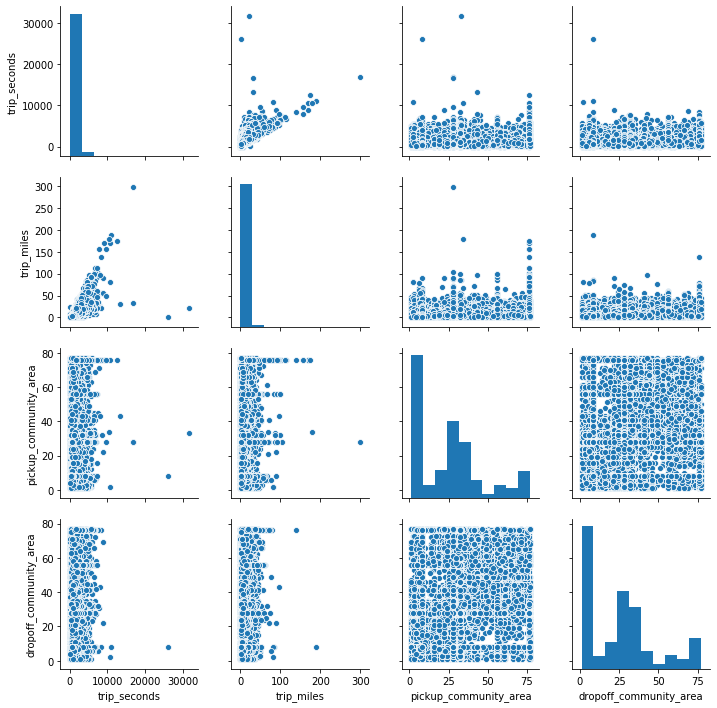

In [18]:
sns.pairplot(ride_data)

In [19]:
ride_data.corr()

,trip_seconds,trip_miles,pickup_community_area,dropoff_community_area
trip_seconds,1.000000,0.810626,0.198383,0.228519
trip_miles,0.810626,1.000000,0.291431,0.342952
pickup_community_area,0.198383,0.291431,1.000000,0.287631
dropoff_community_area,0.228519,0.342952,0.287631,1.000000


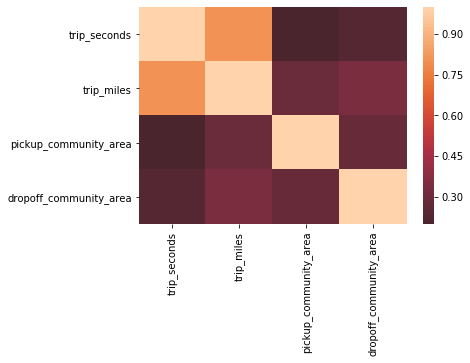

In [20]:
sns.heatmap(ride_data.corr(), center=0)

In [0]:
results_df['start_date'] = [d.date() for d in results_df['trip_start_timestamp']]
results_df['start_time'] = [d.time() for d in results_df['trip_start_timestamp']]

In [22]:
results_df.head()

,trip_id,trip_start_timestamp,trip_end_timestamp,trip_seconds,trip_miles,pickup_community_area,dropoff_community_area,fare,tip,additional_charges,trip_total,start_date,start_time
0,48b8c5efe758f9409c6f0aabd18828c2d38f0ffb,2019-05-20 14:30:00,2019-05-20 14:30:00,685.0,2.076983,24.0,8.0,7.5,0.0,2.55,10.05,2019-05-20,14:30:00
1,48b8c63e665355f8b45fe446bdad07ffb790e814,2019-06-23 10:45:00,2019-06-23 11:00:00,950.0,6.015568,NaN,15.0,10.0,5.0,2.55,17.55,2019-06-23,10:45:00
2,48b8c8dcda35fda6632c6efb34947a48c2afe4a8,2019-06-24 19:45:00,2019-06-24 20:00:00,400.0,1.970414,25.0,NaN,5.0,0.0,2.55,7.55,2019-06-24,19:45:00
3,48b8c90e1a488bde7f99252fefdb39e0bb9670f0,2019-06-15 03:00:00,2019-06-15 03:00:00,501.0,2.437254,8.0,7.0,10.0,0.0,2.55,12.55,2019-06-15,03:00:00
4,48b8c9c54cb887f865eb64ee0b9d882bd347e34f,2019-05-26 19:45:00,2019-05-26 19:45:00,452.0,0.937115,6.0,6.0,2.5,0.0,2.55,5.05,2019-05-26,19:45:00


In [23]:
results_df['end_date'] = [d.date() for d in results_df['trip_end_timestamp']]
results_df['end_time'] = [d.time() for d in results_df['trip_end_timestamp']]
results_df.head()

,trip_id,trip_start_timestamp,trip_end_timestamp,trip_seconds,trip_miles,pickup_community_area,dropoff_community_area,fare,tip,additional_charges,trip_total,start_date,start_time,end_date,end_time
0,48b8c5efe758f9409c6f0aabd18828c2d38f0ffb,2019-05-20 14:30:00,2019-05-20 14:30:00,685.0,2.076983,24.0,8.0,7.5,0.0,2.55,10.05,2019-05-20,14:30:00,2019-05-20,14:30:00
1,48b8c63e665355f8b45fe446bdad07ffb790e814,2019-06-23 10:45:00,2019-06-23 11:00:00,950.0,6.015568,NaN,15.0,10.0,5.0,2.55,17.55,2019-06-23,10:45:00,2019-06-23,11:00:00
2,48b8c8dcda35fda6632c6efb34947a48c2afe4a8,2019-06-24 19:45:00,2019-06-24 20:00:00,400.0,1.970414,25.0,NaN,5.0,0.0,2.55,7.55,2019-06-24,19:45:00,2019-06-24,20:00:00
3,48b8c90e1a488bde7f99252fefdb39e0bb9670f0,2019-06-15 03:00:00,2019-06-15 03:00:00,501.0,2.437254,8.0,7.0,10.0,0.0,2.55,12.55,2019-06-15,03:00:00,2019-06-15,03:00:00
4,48b8c9c54cb887f865eb64ee0b9d882bd347e34f,2019-05-26 19:45:00,2019-05-26 19:45:00,452.0,0.937115,6.0,6.0,2.5,0.0,2.55,5.05,2019-05-26,19:45:00,2019-05-26,19:45:00


In [34]:
ride_df = results_df.iloc[:200000, 1:11]
ride_df.head()

,trip_start_timestamp,trip_end_timestamp,trip_seconds,trip_miles,pickup_community_area,dropoff_community_area,fare
0,2019-05-20 14:30:00,2019-05-20 14:30:00,685.0,2.076983,24.0,8.0,7.5
1,2019-06-23 10:45:00,2019-06-23 11:00:00,950.0,6.015568,NaN,15.0,10.0
2,2019-06-24 19:45:00,2019-06-24 20:00:00,400.0,1.970414,25.0,NaN,5.0
3,2019-06-15 03:00:00,2019-06-15 03:00:00,501.0,2.437254,8.0,7.0,10.0
4,2019-05-26 19:45:00,2019-05-26 19:45:00,452.0,0.937115,6.0,6.0,2.5


In [36]:
ride_df['pickup_community_area'] = ride_df['pickup_community_area'].fillna(0)
ride_df.head()

,trip_start_timestamp,trip_end_timestamp,trip_seconds,trip_miles,pickup_community_area,dropoff_community_area,fare
0,2019-05-20 14:30:00,2019-05-20 14:30:00,685.0,2.076983,24.0,8.0,7.5
1,2019-06-23 10:45:00,2019-06-23 11:00:00,950.0,6.015568,0.0,15.0,10.0
2,2019-06-24 19:45:00,2019-06-24 20:00:00,400.0,1.970414,25.0,NaN,5.0
3,2019-06-15 03:00:00,2019-06-15 03:00:00,501.0,2.437254,8.0,7.0,10.0
4,2019-05-26 19:45:00,2019-05-26 19:45:00,452.0,0.937115,6.0,6.0,2.5


In [37]:
ride_df['dropoff_community_area'] = ride_df['dropoff_community_area'].fillna(0)
ride_df.head()

,trip_start_timestamp,trip_end_timestamp,trip_seconds,trip_miles,pickup_community_area,dropoff_community_area,fare
0,2019-05-20 14:30:00,2019-05-20 14:30:00,685.0,2.076983,24.0,8.0,7.5
1,2019-06-23 10:45:00,2019-06-23 11:00:00,950.0,6.015568,0.0,15.0,10.0
2,2019-06-24 19:45:00,2019-06-24 20:00:00,400.0,1.970414,25.0,0.0,5.0
3,2019-06-15 03:00:00,2019-06-15 03:00:00,501.0,2.437254,8.0,7.0,10.0
4,2019-05-26 19:45:00,2019-05-26 19:45:00,452.0,0.937115,6.0,6.0,2.5


In [40]:
ride_df['start_day'] = [d.weekday() for d in ride_df['trip_start_timestamp']]

ride_df.head()

,trip_start_timestamp,trip_end_timestamp,trip_seconds,trip_miles,pickup_community_area,dropoff_community_area,fare,start_day
0,2019-05-20 14:30:00,2019-05-20 14:30:00,685.0,2.076983,24.0,8.0,7.5,0
1,2019-06-23 10:45:00,2019-06-23 11:00:00,950.0,6.015568,0.0,15.0,10.0,6
2,2019-06-24 19:45:00,2019-06-24 20:00:00,400.0,1.970414,25.0,0.0,5.0,0
3,2019-06-15 03:00:00,2019-06-15 03:00:00,501.0,2.437254,8.0,7.0,10.0,5
4,2019-05-26 19:45:00,2019-05-26 19:45:00,452.0,0.937115,6.0,6.0,2.5,6


In [44]:
ride_df['start_time'] = [d.hour for d in ride_df['trip_start_timestamp']]
ride_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 9 columns):
trip_start_timestamp      200000 non-null datetime64[ns]
trip_end_timestamp        200000 non-null datetime64[ns]
trip_seconds              198615 non-null float64
trip_miles                199979 non-null float64
pickup_community_area     200000 non-null float64
dropoff_community_area    200000 non-null float64
fare                      200000 non-null float64
start_day                 200000 non-null int64
start_time                200000 non-null int64
dtypes: datetime64[ns](2), float64(5), int64(2)
memory usage: 13.7 MB


In [0]:
ride_df['time_block'] = ride_df['start_time']//3

In [46]:
ride_df.head()

,trip_start_timestamp,trip_end_timestamp,trip_seconds,trip_miles,pickup_community_area,dropoff_community_area,fare,start_day,start_time,time_block
0,2019-05-20 14:30:00,2019-05-20 14:30:00,685.0,2.076983,24.0,8.0,7.5,0,14,4
1,2019-06-23 10:45:00,2019-06-23 11:00:00,950.0,6.015568,0.0,15.0,10.0,6,10,3
2,2019-06-24 19:45:00,2019-06-24 20:00:00,400.0,1.970414,25.0,0.0,5.0,0,19,6
3,2019-06-15 03:00:00,2019-06-15 03:00:00,501.0,2.437254,8.0,7.0,10.0,5,3,1
4,2019-05-26 19:45:00,2019-05-26 19:45:00,452.0,0.937115,6.0,6.0,2.5,6,19,6


In [0]:
ride_df['pickup_community_area'] = ride_df['pickup_community_area'].astype('int64')

In [142]:
ind_var = ride_df.iloc[:,4:9]
ind_var =ind_var.drop(columns='fare')
ind_var.head()

,pickup_community_area,dropoff_community_area,start_day,start_time
0,24,8.0,0,14
1,0,15.0,6,10
2,25,0.0,0,19
3,8,7.0,5,3
4,6,6.0,6,19


In [0]:
ind_var = ind_var.drop(columns='dropoff_community_area')

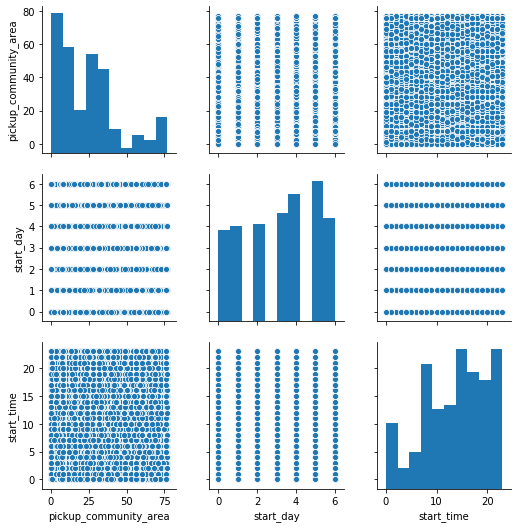

In [144]:
sns.pairplot(ind_var)

**One Hot Encode the categorical variables**

In [112]:
# assign the categorical variables to encode
X = ride_df[[ 'start_day', 'start_time', 'pickup_community_area']]
X.shape

(200000, 3)

In [0]:
# One hot encoding 
from sklearn import preprocessing

In [0]:

# Create One Hot Encoder Object

# 1 Instantiate thh variables

enc = preprocessing.OneHotEncoder()

# 2 Fit

enc.fit(X)

# 3 Transform

onehotlabels = enc.transform(X)




In [122]:
X_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Columns: 111 entries, const to trip_seconds
dtypes: float64(111)
memory usage: 169.4 MB


In [116]:

columns = enc.get_feature_names(input_features=X.columns)


X_df = pd.DataFrame(onehotlabels.todense(), columns=columns)
X_df['trip_seconds'] = ride_df['trip_seconds']
X_df.head()


,start_day_0,start_day_1,start_day_2,start_day_3,start_day_4,start_day_5,start_day_6,start_time_0,start_time_1,start_time_2,start_time_3,start_time_4,start_time_5,start_time_6,start_time_7,start_time_8,start_time_9,start_time_10,start_time_11,start_time_12,start_time_13,start_time_14,start_time_15,start_time_16,start_time_17,start_time_18,start_time_19,start_time_20,start_time_21,start_time_22,start_time_23,pickup_community_area_0,pickup_community_area_1,pickup_community_area_2,pickup_community_area_3,pickup_community_area_4,pickup_community_area_5,pickup_community_area_6,pickup_community_area_7,pickup_community_area_8,...,pickup_community_area_39,pickup_community_area_40,pickup_community_area_41,pickup_community_area_42,pickup_community_area_43,pickup_community_area_44,pickup_community_area_45,pickup_community_area_46,pickup_community_area_47,pickup_community_area_48,pickup_community_area_49,pickup_community_area_50,pickup_community_area_51,pickup_community_area_52,pickup_community_area_53,pickup_community_area_54,pickup_community_area_55,pickup_community_area_56,pickup_community_area_57,pickup_community_area_58,pickup_community_area_59,pickup_community_area_60,pickup_community_area_61,pickup_community_area_62,pickup_community_area_63,pickup_community_area_64,pickup_community_area_65,pickup_community_area_66,pickup_community_area_67,pickup_community_area_68,pickup_community_area_69,pickup_community_area_70,pickup_community_area_71,pickup_community_area_72,pickup_community_area_73,pickup_community_area_74,pickup_community_area_75,pickup_community_area_76,pickup_community_area_77,trip_seconds
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,685.0
1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,950.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,400.0
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,501.0
4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,452.0


In [0]:
X_df['trip_seconds'] = X_df['trip_seconds'].fillna(0)

In [130]:
X_df = X_df.drop(columns='trip_seconds')
X_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Columns: 110 entries, const to pickup_community_area_77
dtypes: float64(110)
memory usage: 167.8 MB


In [0]:
from sklearn.model_selection import train_test_split

In [0]:
y = ride_df['fare']

In [0]:
X_train , X_test, y_train, y_test = train_test_split(X_df, y, test_size=0.25, random_state=12)

In [0]:
import statsmodels.api as sm

In [138]:
X_df = sm.add_constant(X_df)
est = sm.OLS(y, X_df).fit()
est.summary()


/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   fare   R-squared:                       0.199
Model:                            OLS   Adj. R-squared:                  0.199
Method:                 Least Squares   F-statistic:                     469.6
Date:                Tue, 21 Jan 2020   Prob (F-statistic):               0.00
Time:                        18:09:39   Log-Likelihood:            -7.3740e+05
No. Observations:              200000   AIC:                         1.475e+06
Df Residuals:                  199893   BIC:                         1.476e+06
Df Model:                         106                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                        9.7641      0.044    221.995      0.000       9.678       9.850
start_day_0                  1.5258      0.058     26.361      0.000       1.412       1.639
start_day_1                  0.8526      0.057     15.023      0.000       0.741       0.964
start_day_2                  1.1123      0.056     19.800      0.000       1.002       1.222
start_day_3                  1.4174      0.054     26.354      0.000       1.312       1.523
start_day_4                  1.7581      0.050     35.113      0.000       1.660       1.856
start_day_5                  1.4509      0.049     29.885      0.000       1.356       1.546
start_day_6                  1.6470      0.055     29.702      0.000       1.538       1.756
start_time_0                -0.9762      0.119     -8.180      0.000      -1.210      -0.742
start_time_1                -1.1353      0.136     -8.334      0.000      -1.402      -0.868
start_time_2                -0.1292      0.166     -0.780      0.435      -0.454       0.195
start_time_3                 1.2778      0.195      6.566      0.000       0.896       1.659
start_time_4                 3.4913      0.194     17.995      0.000       3.111       3.872
start_time_5                 4.9140      0.166     29.515      0.000       4.588       5.240
start_time_6                 3.1073      0.135     22.954      0.000       2.842       3.373
start_time_7                 1.5098      0.109     13.859      0.000       1.296       1.723
start_time_8                 1.1082      0.097     11.468      0.000       0.919       1.298
start_time_9                -0.3585      0.098     -3.672      0.000      -0.550      -0.167
start_time_10               -0.1447      0.103     -1.400      0.162      -0.347       0.058
start_time_11               -0.1371      0.101     -1.351      0.177      -0.336       0.062
start_time_12                0.2037      0.100      2.041      0.041       0.008       0.399
start_time_13                0.2230      0.100      2.237      0.025       0.028       0.418
start_time_14                0.0760      0.099      0.766      0.444      -0.119       0.271
start_time_15                0.7592      0.095      8.000      0.000       0.573       0.945
start_time_16                0.8959      0.092      9.771      0.000       0.716       1.076
start_time_17                1.1265      0.087     12.962      0.000       0.956       1.297
start_time_18               -0.4660      0.085     -5.509      0.000      -0.632      -0.300
start_time_19               -1.4232      0.086    -16.513      0.000      -1.592      -1.254
start_time_20               -1.4759      0.091    -16.184      0.000      -1.655      -1.297
start_time_21               -1.2510      0.090    -13.846      0.000      -1.428      -1.074
start_time_22 